In [3]:
#Importing Libraries
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading data
df_insurance = pd.read_csv('insurance.csv')

In [6]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df_insurance.shape

(1338, 7)

In [8]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


D:\ProgramData\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


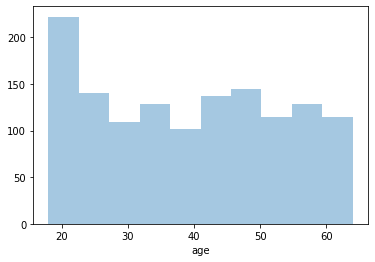

In [10]:
age = df_insurance['age']
sns.distplot(age,bins=10,kde=False)
plt.show()

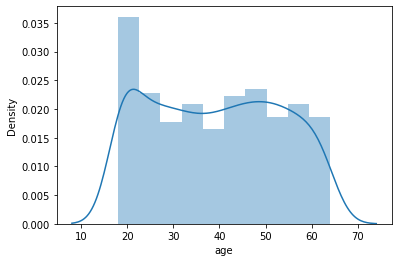

In [11]:
sns.distplot(age,bins=10,kde=True)
plt.show()

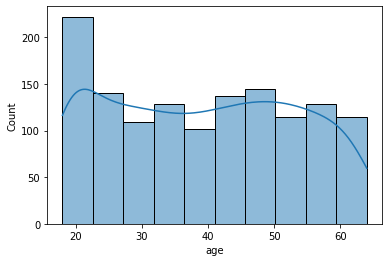

In [12]:
age = df_insurance['age']
sns.histplot(age,bins=10,kde=True)
plt.show()

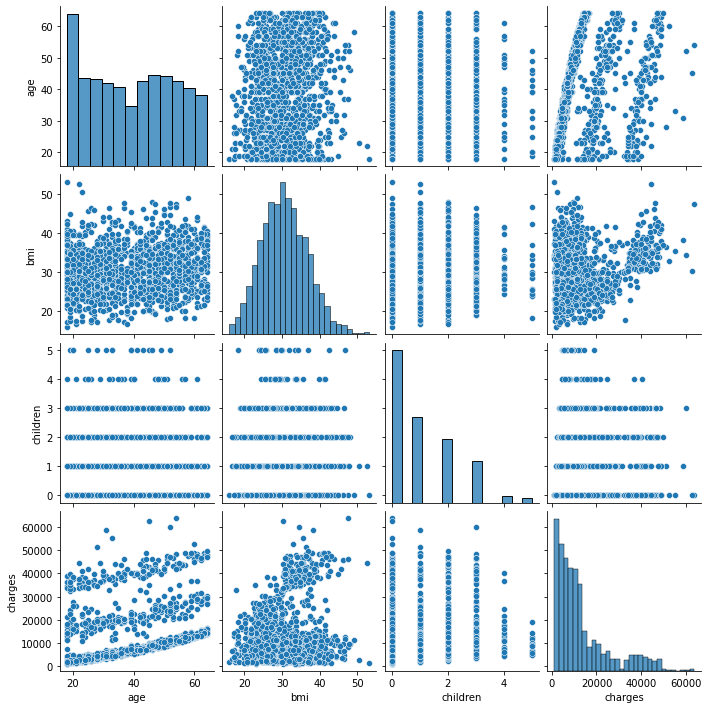

In [13]:
sns.pairplot(df_insurance)

<AxesSubplot:>

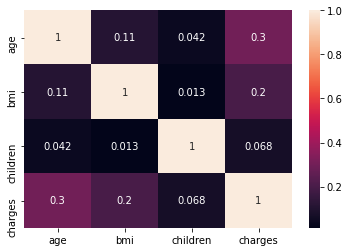

In [14]:
sns.heatmap(df_insurance.corr(), annot= True)

**__- Age and BMI are the most correlated with Charges__**
**__- For Smoke feature we have to perform Std. Scalar and re-plot heatmap to see the correlation__**


In [15]:
df_insurance.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
df_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [17]:
from sklearn import preprocessing
### label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
### Encode labels in column 'Sex'. 
df_insurance['sex']= label_encoder.fit_transform(df_insurance['sex'])
df_insurance['smoker']= label_encoder.fit_transform(df_insurance['smoker'])
df_insurance['region']= label_encoder.fit_transform(df_insurance['region'])                                                   
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [18]:
#from sklearn.preprocessing import StandardScaler
#scalar = StandardScaler().fit(df_insurance)

<AxesSubplot:>

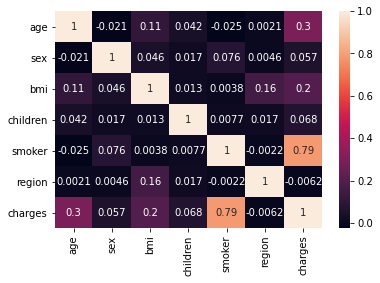

In [19]:
sns.heatmap(df_insurance.corr(), annot= True)

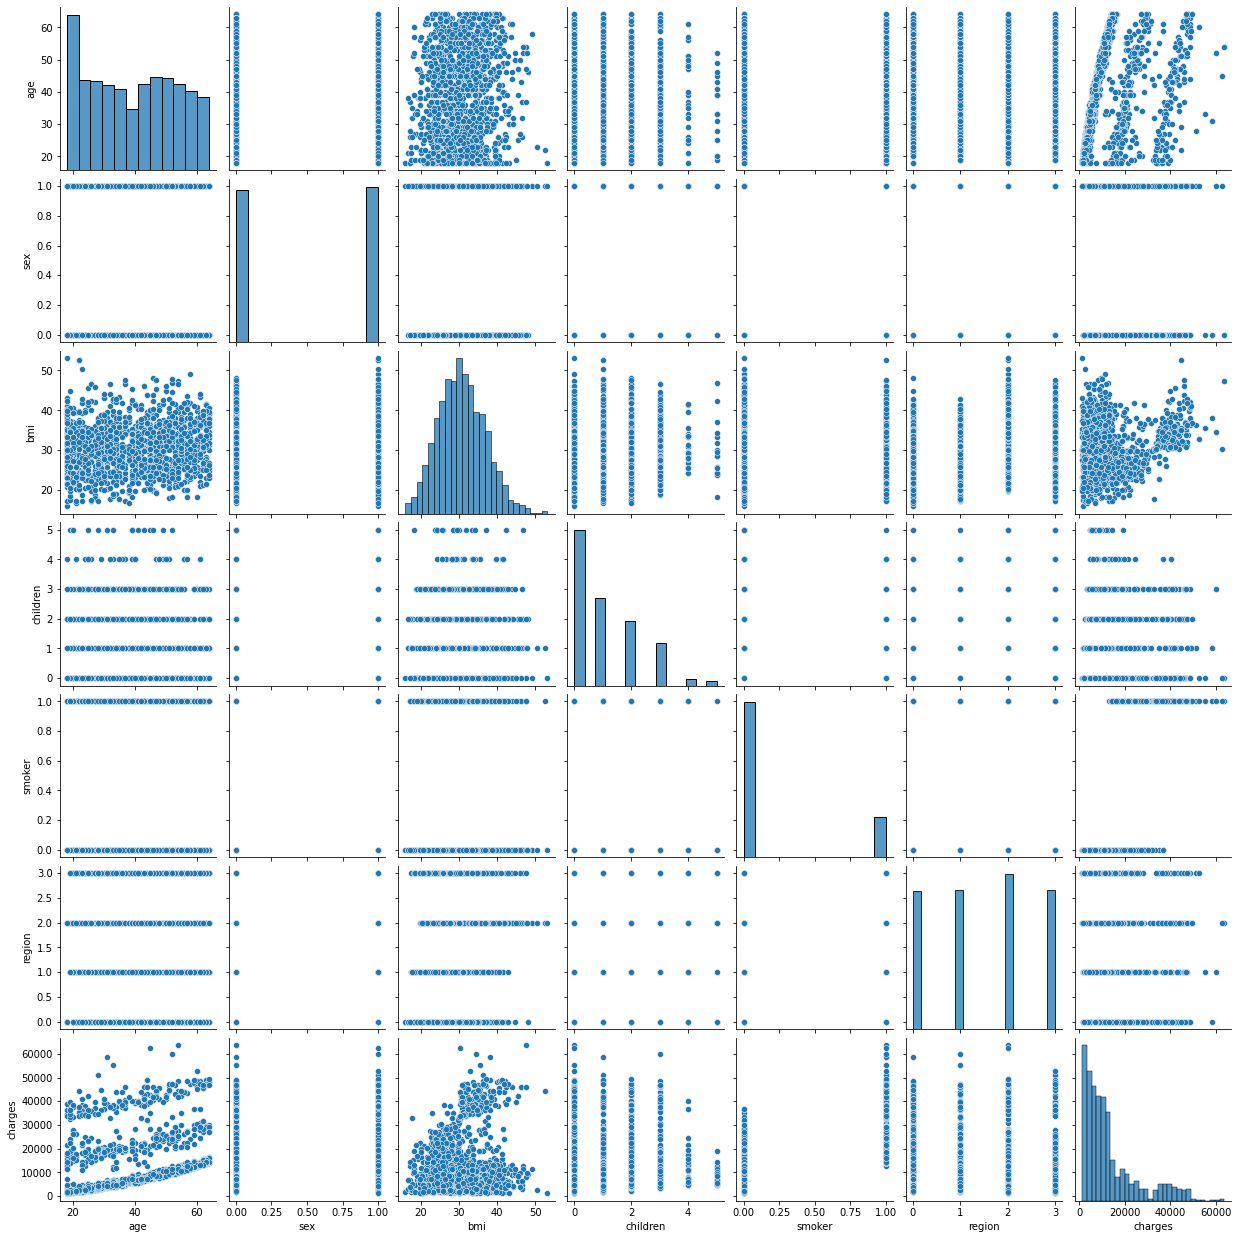

In [20]:
sns.pairplot(df_insurance)

<AxesSubplot:xlabel='age', ylabel='charges'>

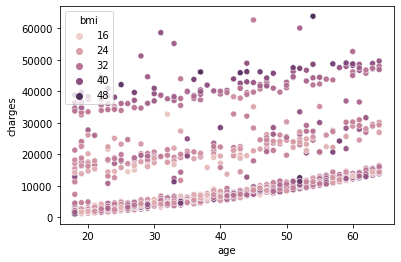

In [21]:
sns.scatterplot(data=df_insurance, x="age", y="charges", hue="bmi")

<AxesSubplot:xlabel='age', ylabel='charges'>

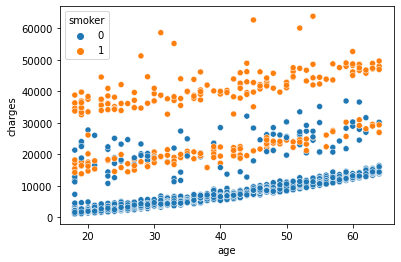

In [22]:
sns.scatterplot(data=df_insurance, x="age", y="charges", hue="smoker")

In [24]:
df_insurance[['bmi', 'smoker']]

,bmi,smoker
0,27.900,1
1,33.770,0
2,33.000,0
3,22.705,0
4,28.880,0
...,...,...
1333,30.970,0
1334,31.920,0
1335,36.850,0
1336,25.800,0


<AxesSubplot:xlabel='bmi', ylabel='charges'>

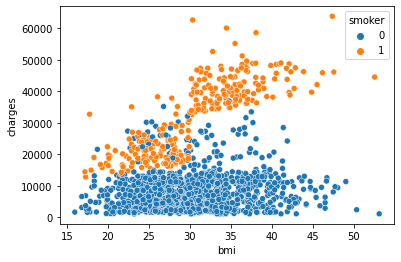

In [26]:
sns.scatterplot(data=df_insurance, x="bmi", y="charges", hue="smoker")

In [68]:
# Function for returning BMI category based on bmi value
# r --> each row of all the series in df
def getBmiCatogery(r):
    if (r.bmi > 30) & (r.charges > 30000.0):
        return 'High'
    else:
        return 'Low'

In [69]:
df_insurance['bmi_cat'] = df_insurance.apply(getBmiCatogery, axis=1)

In [64]:
df_insurance

,age,sex,bmi,children,smoker,region,charges,bmi_cat
0,19,0,27.900,0,1,3,16884.92400,Low
1,18,1,33.770,1,0,2,1725.55230,Low
2,28,1,33.000,3,0,2,4449.46200,Low
3,33,1,22.705,0,0,1,21984.47061,Low
4,32,1,28.880,0,0,1,3866.85520,Low
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,Low
1334,18,0,31.920,0,0,0,2205.98080,Low
1335,18,0,36.850,0,0,2,1629.83350,Low
1336,21,0,25.800,0,0,3,2007.94500,Low


<AxesSubplot:xlabel='bmi', ylabel='charges'>

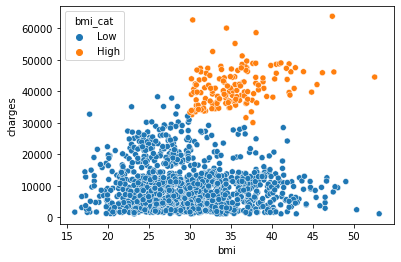

In [70]:
sns.scatterplot(data=df_insurance, x="bmi", y="charges", hue="bmi_cat")